# <font color = "474973"> Figure, Axes & Subplots</font>

## <font color = "364652"> Importing Libraries </font>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## <font color = "364652"> Importing Dataset </font>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
os.chdir("drive/My Drive/Colab Notebooks/Python-Learning-Tutorial/Matplotlib")

In [4]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Python-Learning-Tutorial/Matplotlib'

In [ ]:
HotelData = pd.read_excel("HotelCustomersDataset.xlsx")

In [5]:
HotelData.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = "364652"> Data Preparations </font>

In [6]:
# Monthly Lodginh Revenue and Total Revenue

HotelData = HotelData.assign(
    date=pd.to_datetime("2018-12-31") - pd.to_timedelta(HotelData["DaysSinceCreation"], unit="D"),
    total_revenue=HotelData["LodgingRevenue"] + HotelData["OtherRevenue"],
)


monthly_revenue = (
    HotelData
    .groupby("date")
    .agg({"LodgingRevenue": "sum", "OtherRevenue": "sum", "total_revenue": "sum"})
    .resample("M")
    .sum()
)

monthly_revenue.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [7]:
# Revenue by Country

rev_by_country = (
    HotelData.groupby("Nationality")
    .agg({"total_revenue": "sum"})
    .sort_values("total_revenue", ascending=False)
    .iloc[:5]
)

rev_by_country.head()

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


## <font color = "364652"> Plotting charts with Subplots</font>

The <b>Subplots()</b> method provides a way to plot multiple plots on a single figure and  lets you create a grid of equally sized charts. <br>

```
fig, ax = plt.subplot(rows, columns)
```
This creates a grid with specified rows and columns. By default it returns a figure with a single axes and the value of the arguments are (1,1). <br>
<br>
Given the number of rows and columns, it returns a tuple of (fig, ax) giving a single figure fig with of array of axes ax.You use the indexing method to access the required axes. we can specify ```ax[row][col]``` to access a particular axes to create and modify individual subplots.<br> <br>
Sub plots can be of any chart types and they dont need to be the same type. 

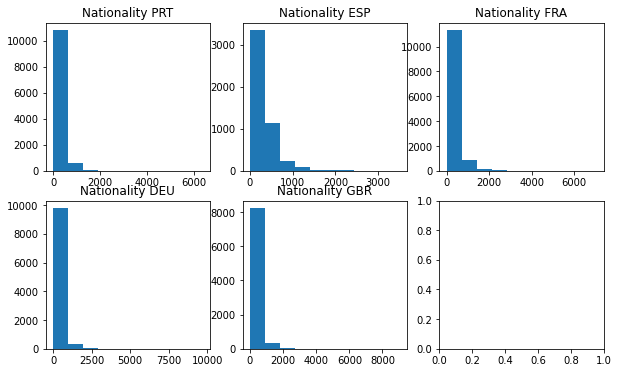

In [12]:
#Plotting the distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR"). We will be limiting the data to booking nights < 15.

#creating fig and axes objects by defining the number of sublots we need. 
fig, ax = plt.subplots(2,3, figsize = (10,6))

# working on the first axes
ax[0][0].hist(HotelData.query("Nationality == 'PRT' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][0].set_title("Nationality PRT")

# working on the second axes
ax[0][1].hist(HotelData.query("Nationality == 'ESP' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][1].set_title("Nationality ESP")

# working on the third axes
ax[0][2].hist(HotelData.query("Nationality == 'FRA' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][2].set_title("Nationality FRA")

# working on the fourth axes
ax[1][0].hist(HotelData.query("Nationality == 'DEU' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[1][0].set_title("Nationality DEU")

# working on the fifth axes
ax[1][1].hist(HotelData.query("Nationality == 'GBR' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[1][1].set_title("Nationality GBR");

We have successfully created the multiple bar charts in a single figure, but they need a lot of formating.

<b> Removing the Extra axes which we don't need. </b>
<br>
<br>
We use ```ax[row, col].set_axis_off()``` to remove the extra chart which we dont want to plot. 

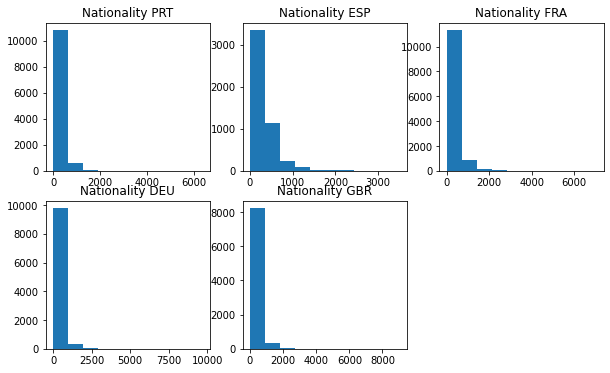

In [16]:
#creating fig and axes objects by defining the number of sublots we need. 
fig, ax = plt.subplots(2,3, figsize = (10,6))

# working on the first axes
ax[0][0].hist(HotelData.query("Nationality == 'PRT' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][0].set_title("Nationality PRT")

# working on the second axes
ax[0][1].hist(HotelData.query("Nationality == 'ESP' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][1].set_title("Nationality ESP")

# working on the third axes
ax[0][2].hist(HotelData.query("Nationality == 'FRA' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][2].set_title("Nationality FRA")

# working on the fourth axes
ax[1][0].hist(HotelData.query("Nationality == 'DEU' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[1][0].set_title("Nationality DEU")

# working on the fifth axes
ax[1][1].hist(HotelData.query("Nationality == 'GBR' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[1][1].set_title("Nationality GBR");

ax[1, 2].set_axis_off()

<b> Cleaning the Figure </b>
<br>
<br>
<font color = "red">constrained_layout</font> is used to fit the plots nicely in the figure. It automatically adjust subplots and decorations like legends and color bar. <br>
constrained_layout is needed to be activated before any axes are added to the figure and is mostly used as an argument to subplots/figure(). 

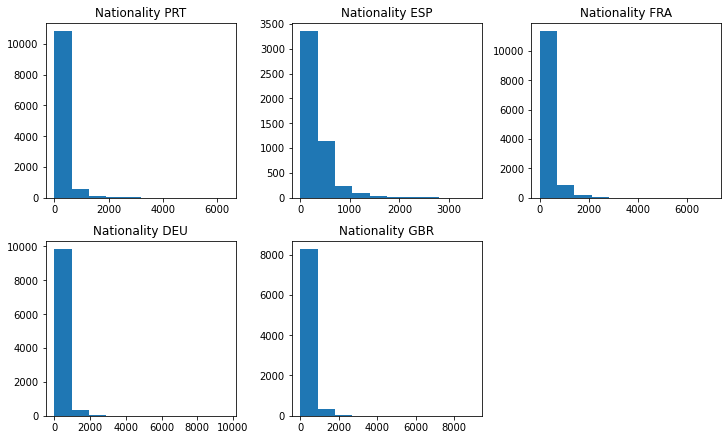

In [15]:
#creating fig and axes objects by defining the number of sublots we need. 
fig, ax = plt.subplots(2,3, figsize = (10,6), constrained_layout = True)

# working on the first axes
ax[0][0].hist(HotelData.query("Nationality == 'PRT' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][0].set_title("Nationality PRT")

# working on the second axes
ax[0][1].hist(HotelData.query("Nationality == 'ESP' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][1].set_title("Nationality ESP")

# working on the third axes
ax[0][2].hist(HotelData.query("Nationality == 'FRA' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[0][2].set_title("Nationality FRA")

# working on the fourth axes
ax[1][0].hist(HotelData.query("Nationality == 'DEU' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[1][0].set_title("Nationality DEU")

# working on the fifth axes
ax[1][1].hist(HotelData.query("Nationality == 'GBR' and RoomNights < 15").loc[:,"LodgingRevenue"]);
ax[1][1].set_title("Nationality GBR");

ax[1, 2].set_axis_off()

Use "ShareX" and "sharey" argumrnts to set the same axis limits on all the plots. lets you share the axis and axis ticks. 
this is set to "none" by default and can be set to "all", "row", "col"
sharing the axis helps in equal comparison. 

If you have to set parameters for each subplot it's handy to iterate over all subplots in a 2D grid using for ax in axs.flat:

In [ ]:
fig = plt.figure(2) # the figure is having 2 axes. 
ax = fig.add_subplot(rowcolumnindex) # adding the subplot. 


plt.tightI() to ensure that the tick labels doesnot overlap

Gridspec
<br>

you can create a layout with charts of varying size by setting a gridspec object. <br>
this creates a grid of specified number of rows and columns<br>
each axis or chart can then occupy a group of squares in the grid. <br>
we use the add_subplot() method to create the subplot by specifying the columns . We use a slice notation to specify the range of the rows and columns for each axis. <br>
constraint layout = True